## PyMC3 Coin flip

In [1]:
import numpy as np
import pymc3 as pm
import theano
from scipy import stats

import arviz as az
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
az.style.use("arviz-darkgrid")

seed = 2020
np.random.seed(seed)

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Flip coin

In [2]:
"""
i flip the coin and get three heads:
         [H,H,H]    

"""    
data_1 = [1,1,1]

## Choosing a prior distribution

Express beliefs about θ with a Beta distribution prior

https://en.wikipedia.org/wiki/Beta_distribution

Text(0.5, 1.0, 'β(2,2)')

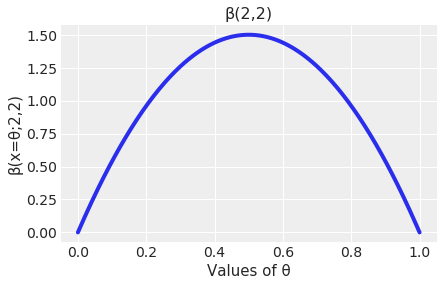

In [3]:
alpha,beta = 2,2 # change values of alpha, beta to get different shape of prior distribution
x_range = np.linspace(0,1,250) # the beta distribution has a support in the range [0,1]
β = stats.beta(alpha,beta).pdf(x_range)
plt.plot(x_range,β)
plt.xlabel('Values of θ')
plt.ylabel('β(x=θ;{},{})'.format(alpha,beta))
plt.title('β({},{})'.format(alpha,beta))

## Exercise 1: Define our Bayesian model


In [4]:
"""
define model 

"""
model = pm.Model() # init model
obs   = theano.shared(np.array(data_1)) # use a theano tensor for observations

with model:
    # prior  ::  P(θ)
    # prior is the Beta(2,2) plotted above
    θ = pm.Beta('θ',alpha=alpha,beta=beta)
    
    # likelihood  ::  P(Data|θ)
    # note that we are passing the observations to the model here
    y = pm.Bernoulli('y',p=θ,observed=obs)

### PyMC3 follows statistical notation for simple model definition

In [5]:
θ

θ

In [6]:
y

y

## Run sampler to approximate the posterior

In [7]:
with model:
    # run MCMC sampler to get samples from posterior
    # (this is the magic inference button 🚨)
    n_samples = 5000
    trace_1 = pm.sample(n_samples,random_seed=seed)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:05<00:00, 4028.47draws/s]


## Plot samples

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7cf5235c0>,
      dtype=object)

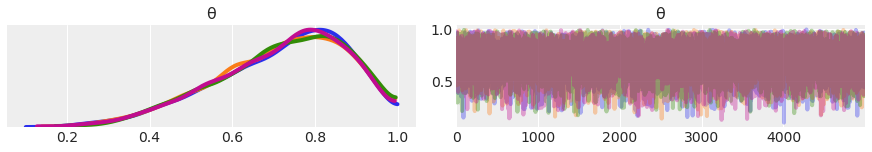

In [8]:
az.plot_trace(trace_1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7c9c18fd0>],
      dtype=object)

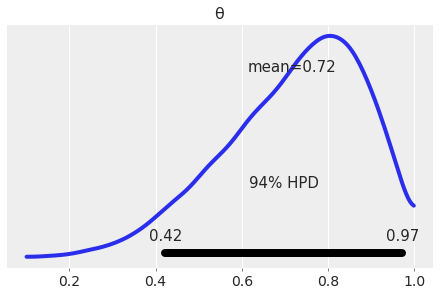

In [9]:
az.plot_posterior(trace_1)

My 94% credibility interval is still quite wide. I need more data to reduce this certainty

## Exercise 2: More data arrives

We flip the coin three more times.

Once again I get three heads

In [10]:
"""
i roll three more heads:
        [H,H,H] + [H,H,H]    

"""    
data_2 = data_1 + [ 1,1,1 ]
data_2

[1, 1, 1, 1, 1, 1]

In [11]:
# update `obs` with the new observations
obs.set_value(data_2)

# run sampler again, no need to redefine model
with model:
    # run MCMC sampler to get samples from posterior
    # (this is the magic inference button 🚨)
    n_samples = 5000
    trace_2 = pm.sample(n_samples,random_seed=seed)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:06<00:00, 3482.58draws/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7d7261a58>],
      dtype=object)

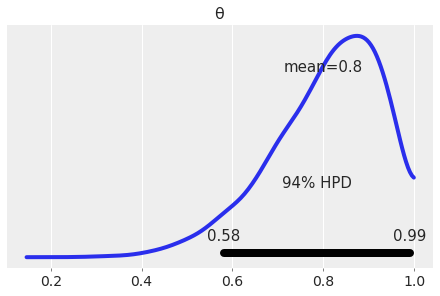

In [12]:
# plot the trace from the above sampling
az.plot_posterior(trace_2)

## Exercise 3: Even more data arrives

choose what the next few flips look like and see how our posterior beliefs adapt

you can even use a real coin

(use 0 for tails, 1 for heads)

In [13]:
"""
i roll the coin a few more times:
        [H,H,H] + [H,H,H] + [?,?,?,?,...]

"""    
data_3 = data_2 + [ 1,0,0,0,0 ]
data_3

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

In [14]:
# update `obs` with the new observations above
obs.set_value(data_3)

# run sampler again
with model:
    # run MCMC sampler to get samples from posterior
    # (this is the magic inference button 🚨)
    n_samples = 5000
    trace_3 = pm.sample(n_samples,random_seed=seed)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:06<00:00, 3364.68draws/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7c9b04fd0>],
      dtype=object)

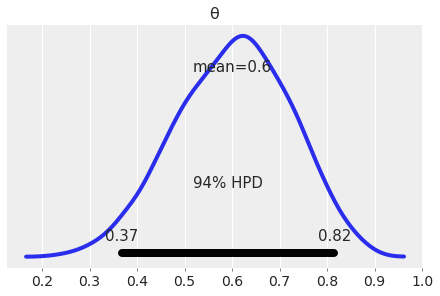

In [15]:
# compare this plot with the previous ones
# have we become more, or less, uncertain? why?
az.plot_posterior(trace_3)